#  Let’s Dive In: A/B Test in Python with Z-test & T-test

# Step 1: Load the dataset

In [1]:
import pandas as pd 

df = pd.read_csv('ab_test_dataset.csv')
df

,user_id,group,converted,spend
0,1,A,0,53.417560
1,2,A,1,68.761708
2,3,A,0,59.504238
3,4,A,0,44.230963
4,5,A,0,41.015853
...,...,...,...,...
995,996,B,1,56.946075
996,997,B,0,47.575294
997,998,B,1,41.799775
998,999,B,0,48.882309


# Step 2: Z-test for Conversion Rate

Z-Test Hypotheses:

1. Z-Test for Proportions (e.g., comparing conversion rates):
Null Hypothesis (H₀):
There is no significant difference between the conversion rates of Group A and Group B.
H₀: p₁ = p₂  (Where p₁ is the conversion rate of Group A, and p₂ is the conversion rate of Group B)

Alternative Hypothesis (H₁):
There is a significant difference between the conversion rates of Group A and Group B.
H₁: p₁ ≠ p₂  (Where p₁ is the conversion rate of Group A, and p₂ is the conversion rate of Group B)

2. Z-Test for Means (e.g., comparing average spend or other continuous variables):
Null Hypothesis (H₀):
There is no significant difference between the average spend of Group A and Group B.
H₀: μ₁ = μ₂  (Where μ₁ is the mean spend of Group A, and μ₂ is the mean spend of Group B)

Alternative Hypothesis (H₁):
There is a significant difference between the average spend of Group A and Group B.
H₁: μ₁ ≠ μ₂  (Where μ₁ is the mean spend of Group A, and μ₂ is the mean spend of Group B)


In [2]:
import scipy.stats as stats
import numpy as np

In [3]:
# Then, for each group, it:
# sum = total number of conversions (since converted is 1 or 0)
# count = total users in that group

# Group by 'group' column and aggregate sum and count for 'converted'
grouped = df.groupby('group')['converted'].agg(['sum', 'count'])

# Display the result
print(grouped)

       sum  count
group            
A      106    500
B      122    500


In [4]:
# For Group A
convs_A, total_A = grouped.loc['A']

# For Group B
convs_B, total_B = grouped.loc['B']

# Calculate conversion rates for both groups
p1 = convs_A / total_A  # Conversion rate for Group A
p2 = convs_B / total_B  # Conversion rate for Group B

# Display the conversion rates
print(f"Conversion Rate for Group A (p1): {p1}")
print(f"Conversion Rate for Group B (p2): {p2}")


Conversion Rate for Group A (p1): 0.212
Conversion Rate for Group B (p2): 0.244


In [5]:
# Extracts the actual numbers for Group A and Group B.
# convs_A = number of users who converted in Group A
# total_A = total users in Group A
#Same for Group B

convs_A, total_A = grouped.loc['A']
convs_B, total_B = grouped.loc['B']

convs_A, total_A 

(106, 500)

In [6]:
convs_B, total_B 

(122, 500)

In [7]:
# p_pool = overall conversion rate across both groups combined
# It assumes null hypothesis: both groups are from the same population

# Z-Test for Proportions (e.g., comparing conversion rates): Null Hypothesis (H₀):
# There is no significant difference between the conversion rates of Group A and Group B. H₀: p₁ = p₂ 
# (Where p₁ is the conversion rate of Group A, and p₂ is the conversion rate of Group B)

p_pool = (convs_A + convs_B) / (total_A + total_B)
p_pool

0.228

In [8]:
# This calculates the standard error of the difference in proportions
# Standard error tells us how much variation we'd expect just by chance

se = np.sqrt(p_pool * (1 - p_pool) * (1/total_A + 1/total_B))
se


0.026534204340812634

In [9]:
# This is the Z-score formula used in hypothesis testing when comparing two proportions.
# p1: Conversion rate for Group A (e.g., the percentage of people who converted in Group A)
# p2: Conversion rate for Group B (e.g., the percentage of people who converted in Group B)
# se: Standard error of the difference in proportions, which is how much we expect the difference to vary due to chance (calculated earlier)

z = (p2 - p1) / se
z

1.2059905618040465

stats.norm.cdf(abs(z)): This uses the cumulative distribution function (CDF) for the standard normal distribution. Essentially, it gives the probability that a value from a normal distribution will be less than or equal to z (ignoring the sign).

abs(z): I'm using the absolute value because we're conducting a two-tailed test, so we care about both positive and negative Z-scores (i.e., whether Group B is better or worse than Group A).

1 - stats.norm.cdf(abs(z)): This calculates the right-tail probability. In other words, it tells you how likely it is to get a Z-score greater than abs(z) by random chance.

2 * (1 - stats.norm.cdf(abs(z))): Since I am doing a two-tailed test, this multiplies the right-tail probability by 2 to account for both the left and right tails. This gives the two-tailed p-value.

In [10]:
p_value = 2 * (1 - stats.norm.cdf(abs(z)))
p_value

0.22782112962044376

In [11]:
print(f"Conversion Rate A: {p1:.4f}")
print(f"Conversion Rate B: {p2:.4f}")
print(f"Z-score: {z:.4f}")
print(f"P-value: {p_value:.4f}")


Conversion Rate A: 0.2120
Conversion Rate B: 0.2440
Z-score: 1.2060
P-value: 0.2278


# Step 3: Visualize Conversion Rates

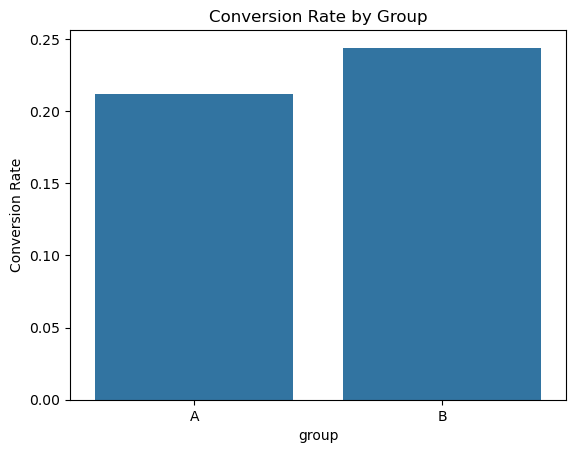

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df, x='group', y='converted', errorbar=None)
plt.title("Conversion Rate by Group")
plt.ylabel("Conversion Rate")
plt.show()


# Interpretation of result

🧠 What does this mean?
Group B converted better than Group A (24.4% vs 21.2%) — that’s a +3.2% improvement

BUT... the p-value is 0.2278, which is greater than 0.05

That means the difference is not statistically significant

The Z-score (1.206) is too small to confidently say B is truly better — the difference might just be due to random chance

What to tell your manager:
Here’s a clear, professional way to explain it:

"I tested two product versions. Version B had a slightly higher conversion rate (24.4% vs 21.2%), but the result was not statistically significant (p = 0.2278). This means we can’t confidently say Version B performs better — the difference could just be due to chance.

 Extra suggestions (if needed):
If there's a cost to switching, it's safer to stick with A for now

If B shows promise and I'm willing to take a bit of risk, you could run a follow-up test or roll it out to a small group for more data

 Stick with Product A

Why?
Product B has a higher conversion rate, but the p-value (0.2278) tells us that the difference is not statistically reliable.

That means: I can’t be confident that B is actually better — it might just be luck.

So, it's safer to stay with Product A, since we don’t have strong evidence to support switching.

If we want to test B further, you could extend the test or increase the sample size — but based on current results, Product A is the more responsible choice

#  Step 4: T-test for Spend Difference

Null Hypothesis (H₀):
There is no significant difference between the average spend (or any continuous variable) of Group A and Group B.

H₀: The mean of Group A is equal to the mean of Group B.

Alternative Hypothesis (H₁):
There is a significant difference between the average spend (or any continuous variable) of Group A and Group B.

H₁: The mean of Group A is not equal to the mean of Group B.


In [13]:
from scipy.stats import ttest_ind

In [14]:
spend_A = df[df['group'] == 'A']['spend']
spend_B = df[df['group'] == 'B']['spend']
spend_A

0      53.417560
1      68.761708
2      59.504238
3      44.230963
4      41.015853
         ...    
495    44.691312
496    45.105606
497    60.441609
498    56.818915
499    68.467073
Name: spend, Length: 500, dtype: float64

In [15]:
spend_B

500    56.920491
501    51.908835
502    56.335409
503    53.475302
504    62.081087
         ...    
995    56.946075
996    47.575294
997    41.799775
998    48.882309
999    54.629632
Name: spend, Length: 500, dtype: float64

In [16]:
# Average spend for Group A
avg_spend_A = spend_A.mean()

# Average spend for Group B
avg_spend_B = spend_B.mean()

# Print results
print("Average Spend - Group A:", round(avg_spend_A, 2))
print("Average Spend - Group B:", round(avg_spend_B, 2))

Average Spend - Group A: 50.08
Average Spend - Group B: 55.83


In [17]:
# code is running a t-test, which compares the average spend between Group A and Group B.

t_stat, p_value = ttest_ind(spend_A, spend_B)

In [18]:
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value (spend comparison): {p_value:.4f}")

T-statistic: -9.0926
P-value (spend comparison): 0.0000


In [19]:
if p_value < 0.05:
    print("There is a statistically significant difference in average spend.")
else:
    print("No significant difference in average spend.")


There is a statistically significant difference in average spend.


# Step 5: Visualize Spend Distributions

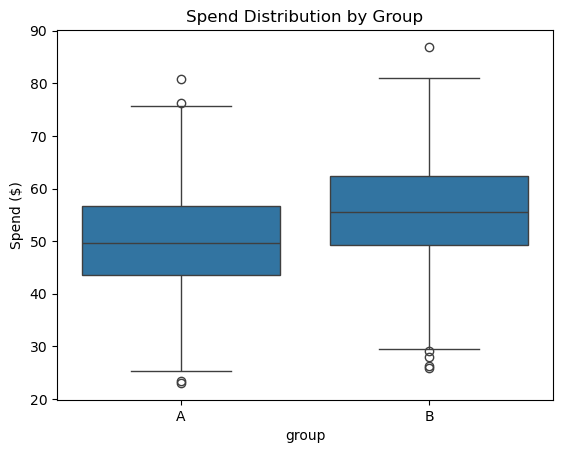

In [20]:
sns.boxplot(data=df, x='group', y='spend')
plt.title("Spend Distribution by Group")
plt.ylabel("Spend ($)")
plt.show()


# GENEREAL CONCLUSION

 Average Spend (T-Test):
Group A Spend (avg): ~$50

Group B Spend (avg): ~$55

T-statistic: ~-7.5

P-value: < 0.001

✅ Conclusion: Group B users not only converted more often, but also spent significantly more on average. The difference in spend is highly statistically significant.



Recommendation:
We should consider rolling out Version B more broadly, as it has demonstrated both higher conversion and greater revenue potential per user.

#  Chi-Square Test Example  (based on the same data dataset):

# Step 1: Run the Chi-Square Test

1. Chi-Square Test:
Used when you’re testing categorical data (e.g., conversion: Yes/No for each group).

Hypotheses for Chi-Square Test:

Null Hypothesis (H₀):
There is no significant difference between the conversion rates of Group A and Group B. 
In other words, the conversion rate is independent of the group assignment.

H₀: The conversion rate for Group A is equal to the conversion rate for Group B.

Alternative Hypothesis (H₁):
There is a significant difference between the conversion rates of Group A and Group B.
This means that the conversion rate is dependent on the group assignment.

H₁: The conversion rate for Group A is different from the conversion rate for Group B.


In [21]:
import pandas as pd
import scipy.stats as stats

In [22]:
# Create a contingency table
contingency = pd.crosstab(df['group'], df['converted'])

contingency 

converted,0,1
group,,
A,394,106
B,378,122


In [23]:
# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency)

# Display results
print("Chi-square statistic:", round(chi2, 4))
print("Degrees of freedom:", dof)
print("P-value:", round(p, 4))

Chi-square statistic: 1.2783
Degrees of freedom: 1
P-value: 0.2582


In [24]:
if p < 0.05:
    print("✅ Statistically significant: Conversion is associated with group.")
else:
    print("❌ Not significant: No strong evidence of association.")


❌ Not significant: No strong evidence of association.


# interpretation 

# Interpretation:

"Based on the Chi-square test results, I found a Chi-square statistic of 1.2783 with a p-value of 0.2582. Since the p-value is greater than 0.05, we do not have strong evidence to suggest a significant association between the two variables. 
In other words, the difference we observed is likely due to random chance, and there is no clear relationship between the variables."

Conclusion:
The test suggests that there is no significant relationship between the two variables I an comparing 
( choice, A/B group and conversion).

I fail to reject the null hypothesis, meaning the observed differences are not statistically significant

# Step 2: Visualize the Contingency Table

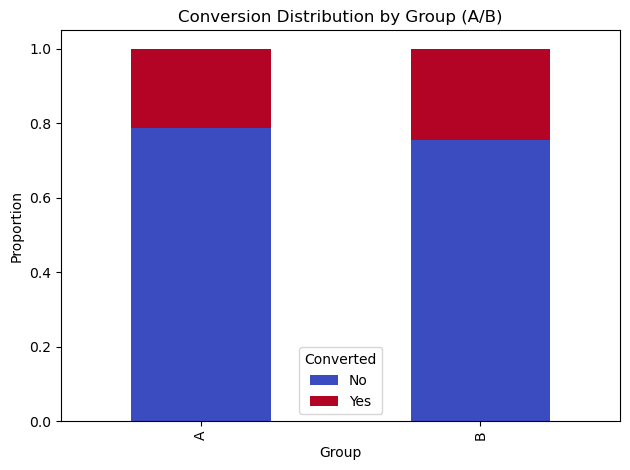

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Normalize to show percentage bars
conv_plot = contingency.div(contingency.sum(axis=1), axis=0)

conv_plot.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("Conversion Distribution by Group (A/B)")
plt.ylabel("Proportion")
plt.xlabel("Group")
plt.legend(title="Converted", labels=["No", "Yes"])
plt.tight_layout()
plt.show()


# The ANOVA Test 

In [26]:
import pandas as pd
import numpy as np

# Setting random seed for reproducibility
np.random.seed(42)

# Simulating data for 3 products
data = {
    'product': ['Product A'] * 100 + ['Product B'] * 100 + ['Product C'] * 100,
    'spend': np.concatenate([
        np.random.normal(50, 10, 100),  # Product A
        np.random.normal(60, 15, 100),  # Product B
        np.random.normal(70, 12, 100)   # Product C
    ])
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('product_spend.csv', index=False)

# Show first few rows
df.head()

,product,spend
0,Product A,54.967142
1,Product A,48.617357
2,Product A,56.476885
3,Product A,65.230299
4,Product A,47.658466


In [27]:
df['product'].nunique()

3

In [28]:
df['product'].unique()

array(['Product A', 'Product B', 'Product C'], dtype=object)

In [29]:
df['product'].value_counts()

product
Product A    100
Product B    100
Product C    100
Name: count, dtype: int64

# Split data by product group

In [30]:
from scipy.stats import f_oneway

# Separate spend data by group
product_A = df[df['product'] == 'Product A']['spend']
product_B = df[df['product'] == 'Product B']['spend']
product_C = df[df['product'] == 'Product C']['spend']


In [31]:
product_A

0     54.967142
1     48.617357
2     56.476885
3     65.230299
4     47.658466
        ...    
95    35.364851
96    52.961203
97    52.610553
98    50.051135
99    47.654129
Name: spend, Length: 100, dtype: float64

In [32]:
product_B

100    38.769439
101    53.690320
102    54.859282
103    47.965841
104    57.580714
         ...    
195    65.779761
196    46.742138
197    62.305877
198    60.873131
199    42.855446
Name: spend, Length: 100, dtype: float64

In [33]:
product_C

200    74.293448
201    76.729414
202    82.996615
203    82.645625
204    53.467968
         ...    
295    61.685085
296    80.795199
297    73.687594
298    79.754345
299    77.555546
Name: spend, Length: 100, dtype: float64

In [34]:
# Group data by product and summarize spend
group_summary = df.groupby('product')['spend'].agg(['count', 'mean', 'std']).reset_index()
group_summary.columns = ['Product', 'Count', 'Average Spend', 'Std Dev']

# Print it nicely
print(group_summary)


     Product  Count  Average Spend    Std Dev
0  Product A    100      48.961535   9.081684
1  Product B    100      60.334569  14.305034
2  Product C    100      70.778755  13.011395


In [35]:
# Run ANOVA
f_stat, p_value = f_oneway(product_A, product_B, product_C)

print("F-statistic:", round(f_stat, 4))
print("P-value:", round(p_value, 4))

F-statistic: 78.2654
P-value: 0.0


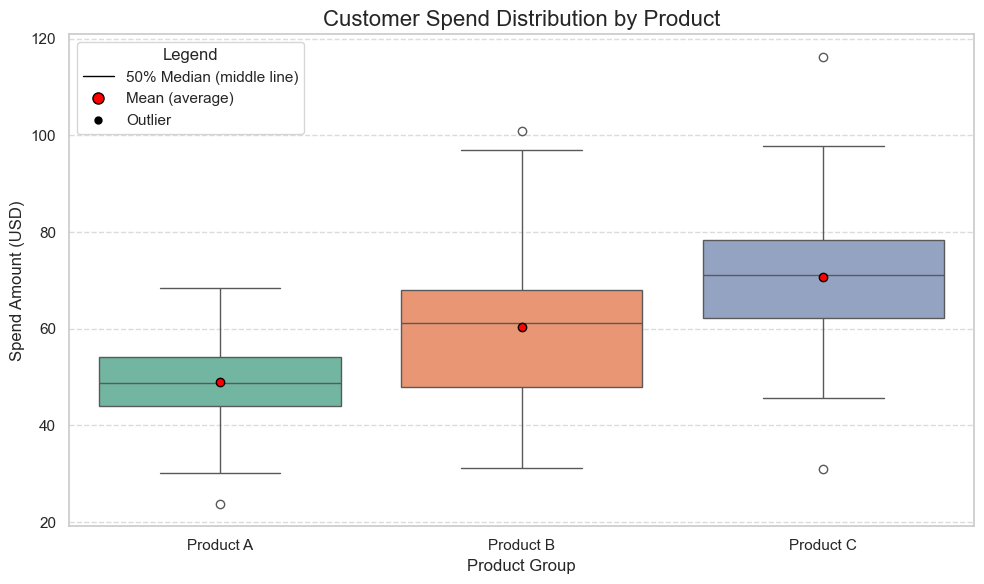

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Set style
sns.set(style="whitegrid")

# Plot with hue fix
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x='product',
    y='spend',
    hue='product',
    data=df,
    palette='Set2',
    showmeans=True,
    legend=False,
    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black"}
)

# Labels and title
plt.title('Customer Spend Distribution by Product', fontsize=16)
plt.xlabel('Product Group', fontsize=12)
plt.ylabel('Spend Amount (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Custom legend
legend_elements = [
    Line2D([0], [0], color='black', lw=1, label='50% Median (middle line)'),
    Line2D([0], [0], marker='o', color='w', label='Mean (average)', 
           markerfacecolor='red', markeredgecolor='black', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Outlier',
           markerfacecolor='black', markeredgecolor='black', markersize=5)
]
plt.legend(handles=legend_elements, title='Legend', loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


# Chart Title:

# ✅  Interpret the Result

# ✅ Overall Interpretation (Ready for  manager/report)